<a href="https://www.kaggle.com/code/fall2fire/linear-regression-from-scratch-r-2-0-90?scriptVersionId=290019024" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df=pd.read_csv('/kaggle/input/slary-data/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Linear Regression
## Linear Regression is a supervised ML algorithm used to predict a continuous value by fitting a straight line through data points.

### The model assumes a linear relationship between input x and output y

# y = mx + c

## Where:

## m → slope (how fast y changes with x)

## c → intercept (value of y when x = 0)

In [4]:
x=df['YearsExperience'] # Feature Variable
y=df['Salary'] # Target

In [5]:
x_mean=x.mean()
y_mean=y.mean()
print(x_mean,y_mean)

5.3133333333333335 76003.0


<Axes: >

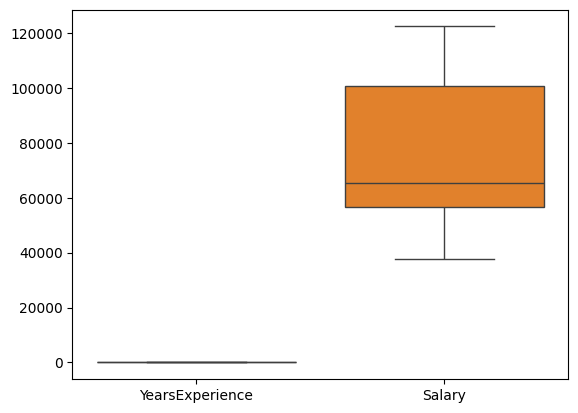

In [6]:
sns.boxplot(df)

# Slope
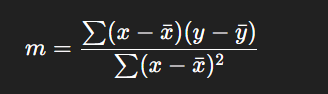
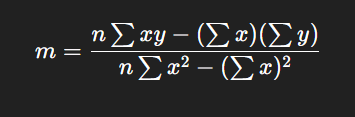

In [7]:
m=sum((x-x_mean)*(y-y_mean))/sum((x-x_mean)**2)
m

9449.962321455076

# Intercept
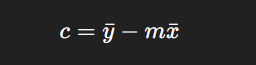
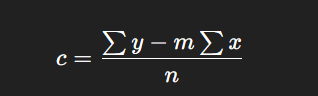

In [8]:
c=y_mean-m*x_mean
c

np.float64(25792.200198668696)

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# Equation for Regression Line
## y = mx + c

In [10]:
def predict(x): # y = mx + c Equation  
    y=m*x+c
    return y

In [11]:
y_pred=predict(xtest)
print(y_pred[:5])  

27    116511.838485
15     72097.015574
23    103281.891235
17     75877.000502
8      56032.079627
Name: YearsExperience, dtype: float64


# Evaluation of Regression
* **Mean Absolute Error(MAE)**
* **Mean Squared Error(MSE)**
* **R^2 Score**

In [12]:
mae=np.mean(np.abs(ytest - y_pred))
print("MAE:", mae)

MAE: 6292.990580363769


In [13]:
mse=np.mean((ytest - y_pred)**2)
print("MSE:", mse)

MSE: 46452879.754848026


In [14]:
ss_total=np.sum((ytest - np.mean(ytest))**2)
ss_residual=np.sum((ytest - y_pred)**2)
r2=1-(ss_residual/ss_total)
print("R^2 Score:",r2)

R^2 Score: 0.9090578530656058


# Regression Plot

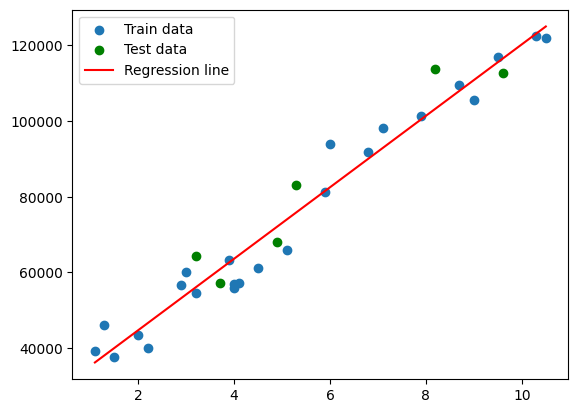

In [15]:
plt.scatter(xtrain,ytrain, label="Train data")
plt.scatter(xtest,ytest, color="green", label="Test data")
plt.plot(x,predict(x), color="red", label="Regression line")
plt.legend()
plt.show()
